In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import scipy.io
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Finding The dataset from Drive
dataset_path = '/content/drive/MyDrive/DataSet/2nd_test/2nd_test/2004.02.12.10.32.39'
df = pd.read_csv(dataset_path)
print(df.columns)

Index(['-0.049\t-0.071\t-0.132\t-0.010'], dtype='object')


In [4]:
dataset_path = '/content/drive/MyDrive/DataSet/2nd_test/2nd_test/2004.02.12.10.32.39'
df = pd.read_csv(dataset_path, sep='\t')
new_column_name = '-0.049\t-0.071\t-0.132\t-0.010'
df = df.rename(columns={new_column_name: 'target'})

In [5]:
import glob
import pandas as pd

directory_path = '/content/drive/MyDrive/DataSet/2nd_test/2nd_test'
file_paths = glob.glob(directory_path + '/*.csv')

datasets = ['/content/drive/MyDrive/DataSet/2nd_test/2nd_test/2004.02.12.10.42.39']

for file_path in file_paths:
    df = pd.read_csv(file_path)
    datasets.append(df)


In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DataSet/2nd_test/2nd_test/2004.02.12.10.32.39')

In [7]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os
path=r'/content/drive/MyDrive/DataSet/2nd_test/2nd_test'

In [8]:
filename = '2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [9]:
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


In [12]:
import pandas as pd
import numpy as np

filename = '2004.02.12.10.32.39'
dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)
missing_values = dataset.isnull().sum()
dataset_filled = dataset.fillna(dataset.mean())
outlier_threshold = 3
dataset_outliers_removed = dataset_filled[(np.abs(dataset_filled - dataset_filled.mean()) <= (outlier_threshold * dataset_filled.std())).all(axis=1)]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(dataset_outliers_removed))
selected_features = [0, 1, 2]
dataset_selected_features = dataset_normalized[selected_features]





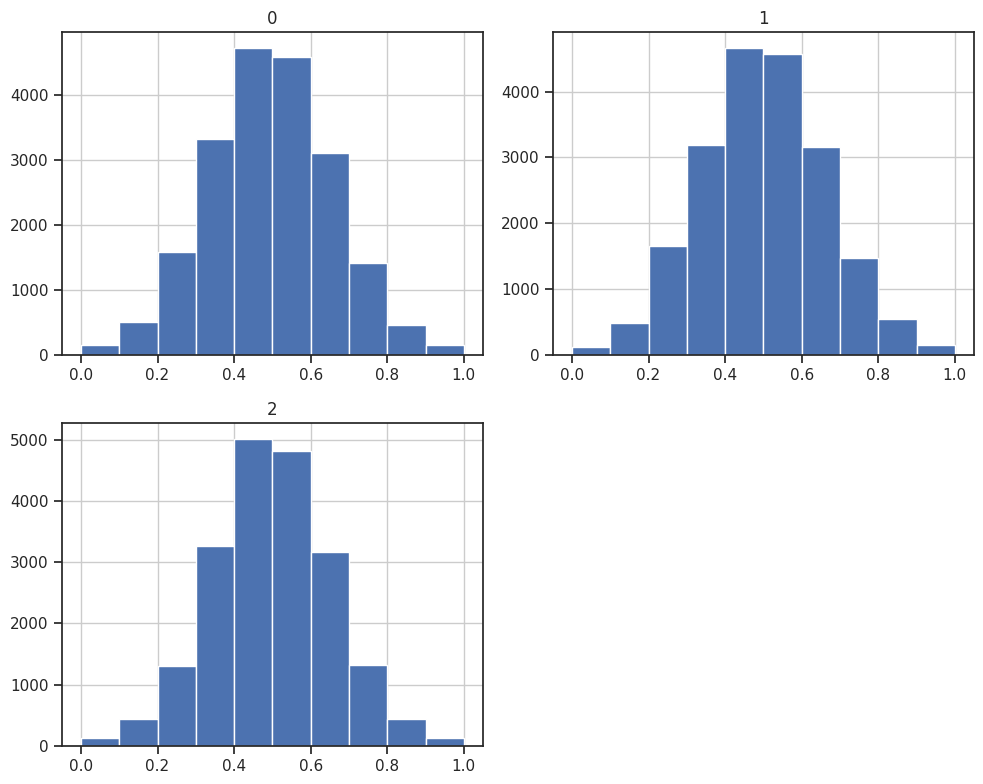

In [42]:
#Data Preprocessing
import matplotlib.pyplot as plt

dataset_selected_features.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


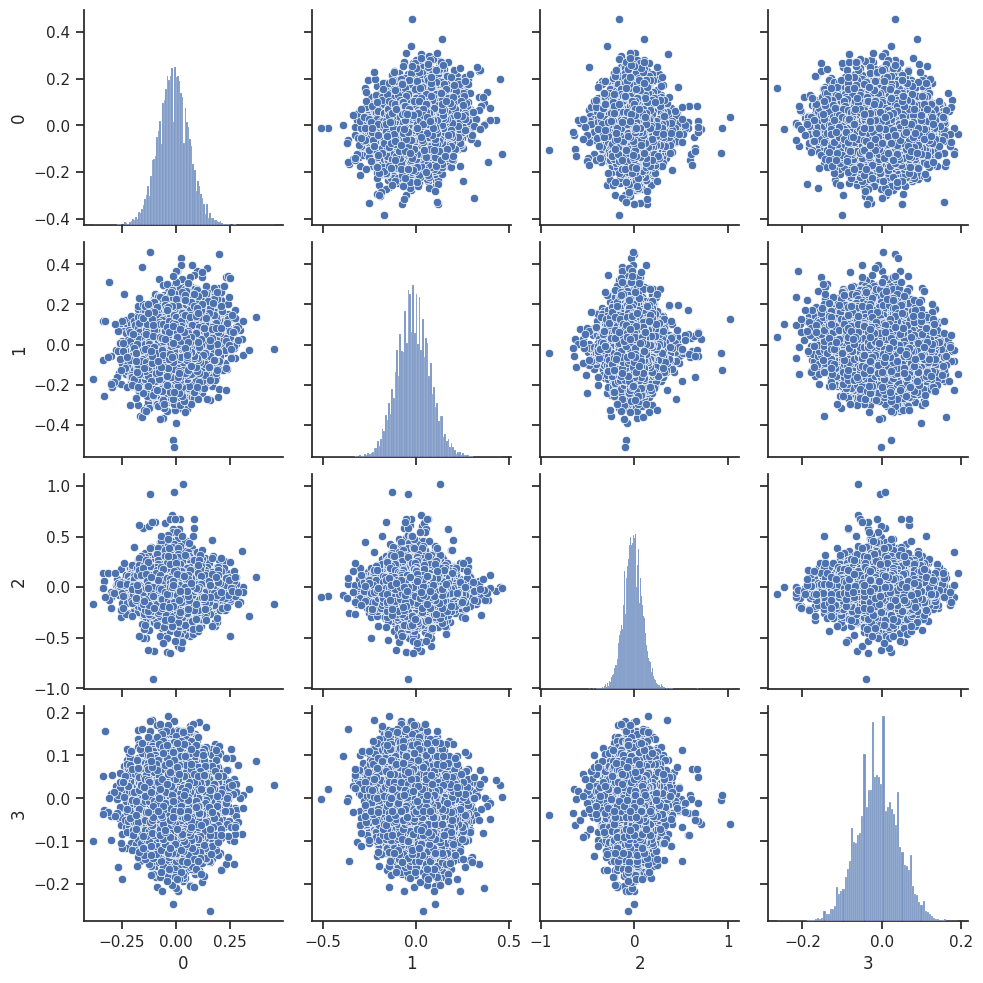

                  0             1             2             3
count  20480.000000  20480.000000  20480.000000  20480.000000
mean      -0.010196     -0.012695     -0.014541     -0.010026
std        0.073477      0.090056      0.108436      0.053168
min       -0.386000     -0.513000     -0.911000     -0.264000
25%       -0.059000     -0.073000     -0.081000     -0.046000
50%       -0.010000     -0.015000     -0.015000     -0.010000
75%        0.037000      0.046000      0.051000      0.027000
max        0.454000      0.464000      1.023000      0.193000


In [43]:
#Exploring the dataset
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
filename = '2004.02.12.10.32.39'
dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)

#Cleaning the Data
dataset.drop_duplicates(inplace=True)

#Handling Missing Values
dataset.dropna(inplace=True)

#Feature Engineering
summary_stats = dataset.describe()
sns.set(style='ticks')
sns.pairplot(dataset, kind='scatter')
plt.show()
print(summary_stats)


In [44]:
import os
import pandas as pd
import numpy as np
import pywt
filename = '2004.02.12.10.32.39'
dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)

#Statistical features
def extract_statistical_features(data):
    features = []
    features.append(np.mean(data))
    features.append(np.std(data))
    features.append(np.median(data))
    return features

#Function to extract wavelet-based features
def extract_wavelet_features(data):
    features = []
    coeffs = pywt.wavedec(data, wavelet='db4', level=3)
    for level in range(len(coeffs)):
        features.extend(extract_statistical_features(coeffs[level]))
    return features

# Extracting features from the vibration signals
feature_matrix = []
for i in range(dataset.shape[1]):
    signal = dataset.iloc[:, i]
    statistical_features = extract_statistical_features(signal)
    wavelet_features = extract_wavelet_features(signal)
    features = statistical_features + wavelet_features
    feature_matrix.append(features)
feature_names = ['stat_mean', 'stat_std', 'stat_median', 'wavelet_1_mean', 'wavelet_1_std', 'wavelet_1_median',
                 'wavelet_2_mean', 'wavelet_2_std', 'wavelet_2_median', 'wavelet_3_mean', 'wavelet_3_std',
                 'wavelet_3_median', 'extra_1', 'extra_2', 'extra_3']
feature_df = pd.DataFrame(feature_matrix, columns=feature_names)
print(feature_df)


   stat_mean  stat_std  stat_median  wavelet_1_mean  wavelet_1_std  \
0  -0.010196  0.073475       -0.010       -0.028994       0.111251   
1  -0.012695  0.090053       -0.015       -0.035889       0.147588   
2  -0.014541  0.108434       -0.015       -0.041049       0.123117   
3  -0.010026  0.053166       -0.010       -0.028322       0.085683   

   wavelet_1_median  wavelet_2_mean  wavelet_2_std  wavelet_2_median  \
0         -0.026739       -0.001130       0.080834         -0.000506   
1         -0.029889        0.001070       0.082680          0.002020   
2         -0.041745       -0.002378       0.093324         -0.003212   
3         -0.027794       -0.000110       0.049886          0.000007   

   wavelet_3_mean  wavelet_3_std  wavelet_3_median   extra_1   extra_2  \
0       -0.001461       0.087802         -0.001276 -0.000059  0.046979   
1        0.000827       0.094109          0.001826 -0.000083  0.068028   
2        0.000059       0.118456         -0.000223  0.001364  0.10

In [45]:
#To perform training, testing, and evaluation
import os
import pandas as pd
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
filename = '2004.02.12.10.32.39'
dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)

def extract_statistical_features(data):
    features = []
    features.append(np.mean(data))
    features.append(np.std(data))
    features.append(np.median(data))
    return features
def extract_wavelet_features(data):
    features = []
    coeffs = pywt.wavedec(data, wavelet='db4', level=3)
    for level in range(len(coeffs)):
        features.extend(extract_statistical_features(coeffs[level]))
    return features

feature_matrix = []
target_variable = []

for i in range(dataset.shape[1]):
    signal = dataset.iloc[:, i]
    statistical_features = extract_statistical_features(signal)
    wavelet_features = extract_wavelet_features(signal)
    features = statistical_features + wavelet_features
    feature_matrix.append(features)
    if i < dataset.shape[1] / 2:
        target_variable.append(0)
    else:
        target_variable.append(1)
feature_names = ['stat_mean', 'stat_std', 'stat_median', 'wavelet_1_mean', 'wavelet_1_std', 'wavelet_1_median',
                 'wavelet_2_mean', 'wavelet_2_std', 'wavelet_2_median', 'wavelet_3_mean', 'wavelet_3_std',
                 'wavelet_3_median', 'extra_1', 'extra_2', 'extra_3']
feature_df = pd.DataFrame(feature_matrix, columns=feature_names)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_variable, test_size=0.2, random_state=42)

#Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.0


In [46]:
#ensuring that the target variable contains samples from at least two different classes
import pandas as pd
y_series = pd.Series(y)
class_counts = y_series.value_counts()
print(class_counts)
unique_classes, class_counts = np.unique(y, return_counts=True)
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} instances")



-0.010    413
-0.015    397
-0.007    397
-0.017    389
-0.002    386
         ... 
-0.247      1
 0.178      1
 0.183      1
-0.264      1
-0.195      1
Length: 161, dtype: int64
Class -0.264: 1 instances
Class -0.247: 1 instances
Class -0.217: 3 instances
Class -0.21: 1 instances
Class -0.208: 2 instances
Class -0.205: 1 instances
Class -0.203: 2 instances
Class -0.195: 1 instances
Class -0.193: 2 instances
Class -0.188: 3 instances
Class -0.186: 2 instances
Class -0.183: 3 instances
Class -0.181: 2 instances
Class -0.178: 4 instances
Class -0.176: 5 instances
Class -0.173: 2 instances
Class -0.171: 5 instances
Class -0.168: 7 instances
Class -0.166: 4 instances
Class -0.164: 3 instances
Class -0.161: 7 instances
Class -0.159: 12 instances
Class -0.156: 3 instances
Class -0.154: 7 instances
Class -0.151: 5 instances
Class -0.149: 14 instances
Class -0.146: 13 instances
Class -0.144: 16 instances
Class -0.142: 27 instances
Class -0.139: 18 instances
Class -0.137: 20 instances
Class -0

In [50]:
# Remaining Useful Life (RUL) for each bearing in the dataset
import os
import pandas as pd
filename = '2004.02.12.10.32.39'
dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)
failure_column = dataset.shape[1] - 1
dataset.iloc[:, failure_column] = dataset.iloc[:, failure_column].astype(bool)

# Calculate the RUL
rul_estimate = []
for i in range(len(dataset)):
    rul = len(dataset) - i
    rul_estimate.append(rul)
dataset['RUL'] = rul_estimate
print(dataset)


           0      1      2      3    RUL
0     -0.049 -0.071 -0.132   True  20480
1     -0.042 -0.073 -0.007   True  20479
2      0.015  0.000  0.007  False  20478
3     -0.051  0.020 -0.002   True  20477
4     -0.107  0.010  0.127   True  20476
...      ...    ...    ...    ...    ...
20475  0.049 -0.051 -0.039   True      5
20476  0.037  0.061  0.115   True      4
20477 -0.012  0.007  0.056   True      3
20478 -0.012  0.093  0.017   True      2
20479  0.020  0.076 -0.042   True      1

[20480 rows x 5 columns]


In [52]:
!pip install lifelines


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 9.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=a35a9ef0f95d869d2b3d46239a55f08211f60cbf8747ff102865eeac150b8ea1
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [54]:
#RUL Using  Survival Analysis
import os
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
filename = '2004.02.12.10.32.39'
dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)
failure_column = dataset.shape[1] - 1
dataset.iloc[:, failure_column] = dataset.iloc[:, failure_column].astype(bool)
censored_data = dataset[dataset.iloc[:, failure_column] == False]
event_data = dataset[dataset.iloc[:, failure_column] == True]

#Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(event_data.iloc[:, 0], event_observed=event_data.iloc[:, failure_column])

# Estimating it now
rul_estimate = kmf.conditional_time_to_event_
dataset['RUL'] = np.nan
dataset.loc[event_data.index, 'RUL'] = rul_estimate
print(dataset)


           0      1      2      3  RUL
0     -0.049 -0.071 -0.132   True  NaN
1     -0.042 -0.073 -0.007   True  NaN
2      0.015  0.000  0.007  False  NaN
3     -0.051  0.020 -0.002   True  NaN
4     -0.107  0.010  0.127   True  NaN
...      ...    ...    ...    ...  ...
20475  0.049 -0.051 -0.039   True  NaN
20476  0.037  0.061  0.115   True  NaN
20477 -0.012  0.007  0.056   True  NaN
20478 -0.012  0.093  0.017   True  NaN
20479  0.020  0.076 -0.042   True  NaN

[20480 rows x 5 columns]
